**Diabetes Predictor**

In [1]:
# Import API libraries
import pandas as pd
import matplotlib.pyplot as plot

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from ipywidgets import interact, widgets
from IPython.display import display

**Diabetes dataset**

In [2]:
# Load the dataset
url = "https://raw.githubusercontent.com/marnelquintos/diabetes-predictor/main/diabetes_final.csv"
df = pd.read_csv(url)

**Visualization One**

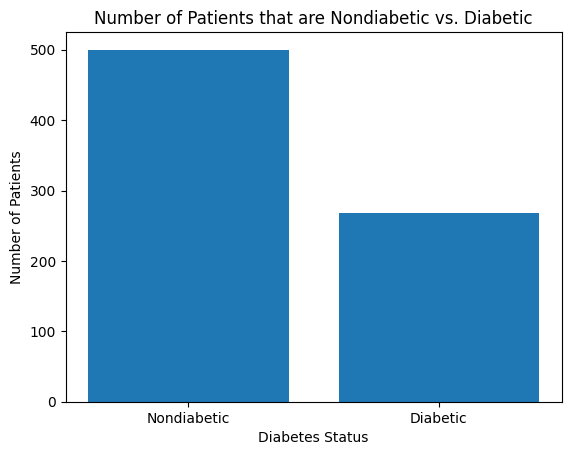

In [3]:
# Bar chart visualization of the dataset
# Nondiabetic vs. Diabetic

# df and diabetes_count intialization
df['Outcome'] = df['Outcome'].map({0: 'Nondiabetic', 1: 'Diabetic'}) # Map the outcome where 0 = Nondiabetic and 1 = Diabetic
diabetes_count = df['Outcome'].value_counts() # Count the number of patients that have diabetes vs does not have diabetes

# Create the bar chart, labels, and display plot
plot.bar(diabetes_count.index, diabetes_count.values)
plot.xlabel('Diabetes Status')
plot.ylabel('Number of Patients')
plot.title('Number of Patients that are Nondiabetic vs. Diabetic')
plot.show()

The bar chart above displays the number of patients that do not have diabets compared to patients that do have diabetes.

**Visualization Two**

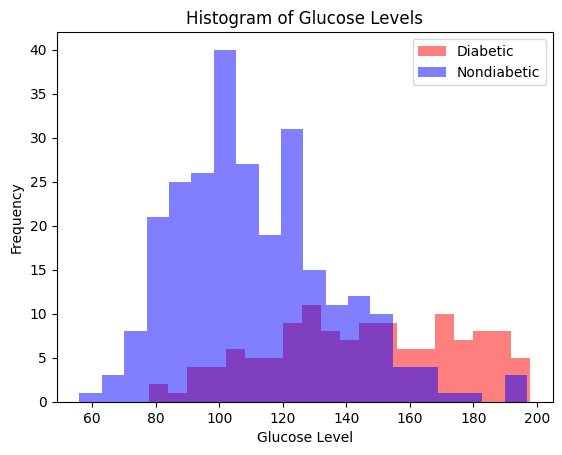

In [4]:
# Histogram visualization of Glucose in Diabetic vs Nondiabetic

# Data cleanup
df = df.replace(0, None) # Replace zeros with null values
df = df.dropna() # Drop rows that contain null values
df['Outcome'] = df['Outcome'].fillna(0) # Replace null values back to 0 for column 'Outcome' only

# Separate the glucose based on Diabetic or Nondiabetic outcome
df_diabetic = df[df['Outcome'] == 'Diabetic'] # Separate glucose for Diabetic outcome
df_nondiabetic = df[df['Outcome'] == 'Nondiabetic'] # Separate glucose for Nondiabetic outcome

# Create the histogram
plot.hist(df_diabetic['Glucose'], bins=20, alpha=0.5, color='red', label='Diabetic') # Diabetic
plot.hist(df_nondiabetic['Glucose'], bins=20, alpha=0.5, color='blue', label='Nondiabetic') # Nondiabetic

# Add title, labels, and legend
plot.xlabel('Glucose Level')
plot.ylabel('Frequency')
plot.title('Histogram of Glucose Levels')
plot.legend(['Diabetic', 'Nondiabetic'])

# Display the plot
plot.show()

The histogram above shows the the glucose levels of diabetics and nondiabetics.

**Logistic Regression Model**

In [5]:
# My Logistic Regression Model
# Supervised Learning
# Classification predict Diabetes category

# Data Preprocessing
X = df.drop('Outcome', axis=1) # Independent variable - Create new df that contains all columns except 'Outcome'
y = df['Outcome'] # Dependent variable - Create new df that contains only 'Outcome'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # Split into a training set and test set

# Model training and prediction
model = LogisticRegression() # Initialize the Logistic Regression model
model.fit(X_train.values, y_train) # Train the Logistic Regression model
y_pred = model.predict(X_test.values) # Make predictions on the test set

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Model Accuracy: {accuracy}")

Logistic Regression Model Accuracy: 0.7966101694915254


The dataset gets processed, trained and a prediction is made. The model then gets evaluated and displays the accuracy up above.

**Visualization Three**

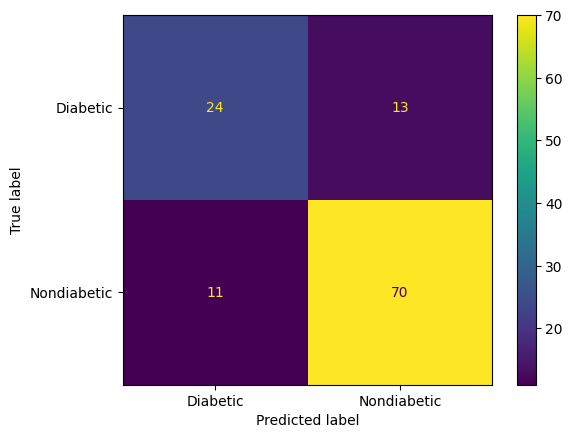

In [6]:
# Confusion Matrix visualization of my model

# Confusion Matrix creation
cm = confusion_matrix(y_test, y_pred)

# Confusion matrix visualization and display plot
vis = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
vis.plot()
plot.show()

The confusion matrix displays the performance of the Logistic Regression model.

**User Interface**

In [7]:
# User Interface

# Widget sliders
glucose_widget = widgets.IntSlider(description='Glucose:', min=50, max=200) # Glucose widget
bp_widget = widgets.IntSlider(description='Blood Pressure:', min=20, max=120) # Blood pressure widget
insulin_widget = widgets.IntSlider(description='Insulin:', min=5, max=900) # Insulin widget
bmi_widget = widgets.FloatSlider(description='BMI:', min=18, max=70) # BMI widget
age_widget = widgets.IntSlider(description='Age:', min=18, max=85) # Age widget

# Button used for predicitions
predict_button = widgets.Button( description='Predict' ) # Predict button
output_button = widgets.Label(value='Enter values and click the \"Predict\" button.' ) # Predict button output

# Function for when the user clicks on the button
def user_predict(b):
    prediction = model.predict([[ glucose_widget.value, bp_widget.value, insulin_widget.value, bmi_widget.value, age_widget.value]])
    output_button.value='The patient is ' + str(prediction[0])
predict_button.on_click(user_predict)

# Display sliders in a VBox
vb=widgets.VBox([glucose_widget, bp_widget, insulin_widget, bmi_widget, age_widget, predict_button,output_button]) #VBox
print('Please enter the patient\'s medical values and click "Predict":') # User input instructions
display(vb) # Display VBox

Please enter the patient's medical values and click "Predict":


The user can use the above interactive tool to predict if a patient is diabetic or nondiabetic.